# Morning Lecture

# Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  
df=pd.read_csv("train.csv")
df=df.fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


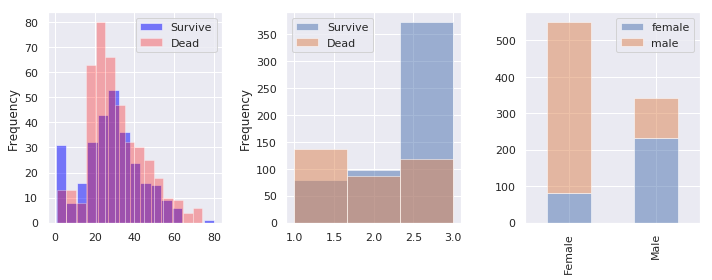

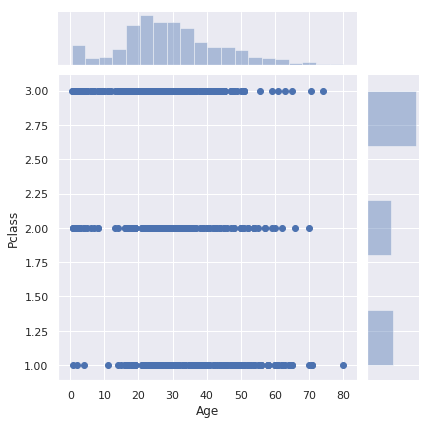

In [18]:
d_age=pd.DataFrame(df[df['Survived']==0]['Age'])
l_age=pd.DataFrame(df[df['Survived']==1]['Age'])
# first way 
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,4))
l_age.plot.hist(bins=15,color='blue',alpha=0.5,ax=ax1)
d_age.plot.hist(bins=15,color='red',alpha=0.3,ax=ax1)
ax1.legend(["Survive", "Dead"])
# second way 
df[df['Survived']==0]['Pclass'].plot.hist(bins=3,alpha=0.5,ax=ax2)
df[df['Survived']==1]['Pclass'].plot.hist(bins=3,alpha=0.5,ax=ax2)
ax2.legend(["Survive", "Dead"])
# second way for gender (stacked)
df.groupby('Survived')['Sex'].value_counts().unstack(1).plot.bar(stacked=True,alpha=0.5,ax=ax3)
# gender unstacked
#df.groupby('Survived')['Sex'].value_counts().unstack(1).plot.bar(stacked=True,alpha=0.5,ax=ax3)
ax3.set_xticklabels(labels=['Female','Male'])
ax3.xaxis.label.set_visible(False)
ax3.legend().set_title('')
fig.tight_layout()
sns.jointplot(x=df["Age"], y=df["Pclass"], kind='scatter')

In [60]:
#pd.DataFrame(df[df['Survived']==1]['Age']).head()
#df.groupby('Survived')['Sex'].value_counts().unstack(1).plot.bar(stacked=True)
df.groupby('Survived')['Sex'].value_counts().unstack(1)
pd.DataFrame(df.ix[(df['Survived']==1) & (df['Age'] < 25)]['Age'])

/home/spiced/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Age
9,14.00
10,4.00
22,15.00
39,14.00
43,3.00
44,19.00
56,21.00
58,5.00
68,17.00
78,0.83


# Afternoon Lecture

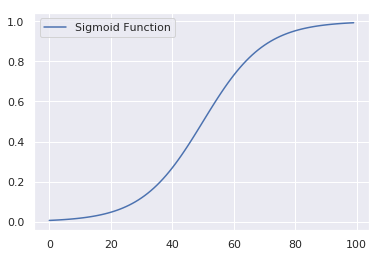

In [19]:
from math import e
import matplotlib.pyplot as plt
def sigmoid(a,b,x):
    linear=a*x+b
    sig=1/(1+e**-(linear))
    
    return sig

ages=[i for i in range(0,100,1)]
yvals=[]
for i in ages:
    y=sigmoid(0.1,-5,i) #change a and b values and see the difference
    yvals.append(y)

plt.plot(ages,yvals,label='Sigmoid Function')
plt.legend() # if you dont add this, it doesnt show the label!?!


`a` value influences the slope / sensitivity of the linear boundary.
the higher `a` value, the more "certain" the model is in predicting the output.
`b` value influences the actual threshold.
`b` shifts the curveright or left (threshold).


In [20]:
df=pd.read_csv('train.csv')
X=df[['Pclass']] # X data must be multi-dimensional (i.e. a DataFrame) X is a matrix
y=df['Survived']  # y data must be one dimensional (i.e. y Series) y is a vector

In [21]:
from sklearn.linear_model import LogisticRegression #Step 1

In [22]:
# Step 2: Instantiate the model (set it equal to a variable)
m=LogisticRegression() # Build the model

In [23]:
# Step 3: Train our model
m.fit(X,y)

/home/spiced/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
m.score(X,y)

0.6790123456790124

In [25]:
m.predict(X)
m.predict_proba(X)

array([[0.7480416 , 0.2519584 ],
       [0.36508232, 0.63491768],
       [0.7480416 , 0.2519584 ],
       ...,
       [0.7480416 , 0.2519584 ],
       [0.36508232, 0.63491768],
       [0.7480416 , 0.2519584 ]])

In [26]:
m.coef_, m.intercept_

(array([[-0.82078354]]), array([1.37415603]))

In [27]:
# X ---> [1/1+e^-(-0.8207X + 1.37)] ----> y

In [37]:
younger = df[df['Age']<=25][['Survived']]
middle = df[(df['Age']>25) & (df['Age']<=45)]['Survived']
older = df[(df['Age']>45) & (df['Age']<=95)]['Survived']
younger

,Survived
0,0
7,0
9,1
10,1
12,0
14,0
16,0
22,1
24,0
27,0
